In [3]:
import os, sys, glob, csv
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, usually either "0" or "1"
# os.environ["CUDA_VISIBLE_DEVICES"]="1" 
import numpy as np
import pandas as pd
import shutil
import pickle
import tqdm
from tqdm import tqdm
import xlsxwriter
import random
from random import shuffle
from math import log, floor
import re
import collections
from collections import Counter
import string
import unicodedata as udata
import pause, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from distutils.dir_util import copy_tree
from sklearn.metrics import *
import itertools as it

需要:
1. process2family_df.csv'
2. tree-rep-logs-partial

* 僅拿train的一對多來做統計
* 計算profile中api invocation call長度眾數
* 目前僅拿train of 一對多來生成文本給Sent2Vec

## 總表family ground truth 製作
* one2many

In [2]:
all_df = pd.read_csv('./data/tree-rep-profiles-partial/process2family_df.csv')
root_dir = './data/tree-rep-profiles_one2many/normal/'
av_col = all_df.columns[1:].tolist()
fam_dir = next(os.walk(root_dir))[1]
fam_dir = [x.split('_')[0] for x in fam_dir]
av_df_col = []
for name in av_col:
    if name in fam_dir:
        av_df_col.append(name)
# av_df_col = ['profile'] + av_df_col
print(len(av_df_col))
av_df_col

184


['1.fakeav',
 '2.fakealert',
 '3.kazy',
 '4.zbot',
 '5.symmi',
 '6.allaple',
 '7.virut',
 '8.ursu',
 '9.solimba',
 '10.zusy',
 '11.virtob',
 '12.loadmoney',
 '13.graftor',
 '14.vobfus',
 '15.barys',
 '16.soft',
 '17.expiro',
 '18.sytro',
 '19.razy',
 '20.hotbar',
 '21.ramnit',
 '22.domaiq',
 '23.sality',
 '24.kryptik',
 '25.installcore',
 '26.lmn',
 '27.softpulse',
 '28.strictor',
 '29.delf',
 '30.mplug',
 '31.kdz',
 '32.browsefox',
 '33.autoit',
 '34.downloa',
 '35.nimnul',
 '36.morstar',
 '37.parite',
 '38.msil',
 '39.elkern',
 '40.tepfer',
 '41.outbrowse',
 '42.sirefef',
 '43.mira',
 '44.screensaver',
 '45.firseria',
 '46.killav',
 '47.somoto',
 '48.rahack',
 '49.upatre',
 '50.brresmon',
 '51.shodi',
 '52.startpage',
 '53.simda',
 '54.soltern',
 '55.zygug',
 '56.shiz',
 '57.mikey',
 '58.ibryte',
 '59.megasearch',
 '60.conjar',
 '61.ircbot',
 '62.renos',
 '63.jorik',
 '64.installerex',
 '65.shipup',
 '66.bdmj',
 '67.madangel',
 '68.bredo',
 '69.onlinegames',
 '70.hoax',
 '71.eggnog',

In [3]:
root_dir = './data/tree-rep-profiles_one2many/small_short/'
av_col = all_df.columns[1:].tolist()
fam_dir = next(os.walk(root_dir))[1]
fam_dir = [x.split('_')[0] for x in fam_dir]
av_df_col_small = []
for name in av_col:
    if name in fam_dir:
        av_df_col_small.append(name)
# av_df_col = ['profile'] + av_df_col
print(len(av_df_col_small))
av_df_col_small

183


['1.fakeav',
 '2.fakealert',
 '3.kazy',
 '4.zbot',
 '5.symmi',
 '6.allaple',
 '7.virut',
 '8.ursu',
 '9.solimba',
 '10.zusy',
 '11.virtob',
 '12.loadmoney',
 '13.graftor',
 '14.vobfus',
 '15.barys',
 '16.soft',
 '17.expiro',
 '18.sytro',
 '19.razy',
 '20.hotbar',
 '21.ramnit',
 '22.domaiq',
 '23.sality',
 '24.kryptik',
 '25.installcore',
 '26.lmn',
 '27.softpulse',
 '28.strictor',
 '29.delf',
 '30.mplug',
 '31.kdz',
 '32.browsefox',
 '33.autoit',
 '34.downloa',
 '35.nimnul',
 '36.morstar',
 '37.parite',
 '38.msil',
 '39.elkern',
 '40.tepfer',
 '41.outbrowse',
 '42.sirefef',
 '43.mira',
 '44.screensaver',
 '45.firseria',
 '46.killav',
 '47.somoto',
 '48.rahack',
 '49.upatre',
 '50.brresmon',
 '51.shodi',
 '52.startpage',
 '53.simda',
 '54.soltern',
 '55.zygug',
 '56.shiz',
 '57.mikey',
 '58.ibryte',
 '59.megasearch',
 '60.conjar',
 '61.ircbot',
 '62.renos',
 '63.jorik',
 '64.installerex',
 '65.shipup',
 '66.bdmj',
 '67.madangel',
 '68.bredo',
 '69.onlinegames',
 '70.hoax',
 '71.eggnog',

In [4]:
aliase_av_df_col = av_df_col + av_df_col_small
aliase_av_df_col = [x.split('.')[-1] for x in aliase_av_df_col]
aliase_av_df_col = list(set(aliase_av_df_col))
aliase_av_df_col = sorted(aliase_av_df_col)
len(aliase_av_df_col) , aliase_av_df_col

(192,
 ['adload',
  'aira',
  'allaple',
  'alman',
  'almanahe',
  'amonetize',
  'archsms',
  'asoecem',
  'autoit',
  'avmh',
  'banker',
  'barys',
  'bdmj',
  'berbew',
  'bettersurf',
  'bifrose',
  'bjlog',
  'bredo',
  'browsefox',
  'brresmon',
  'bublik',
  'bundlore',
  'buzus',
  'buzy',
  'casino',
  'cerber',
  'chinky',
  'chir',
  'chydo',
  'clickdownload',
  'codecpack',
  'conduit',
  'conjar',
  'cryptolocker',
  'crytex',
  'cycbot',
  'darkkomet',
  'dealply',
  'delf',
  'dialer',
  'dinwod',
  'directdow',
  'domaiq',
  'downloa',
  'downloadadmin',
  'downloadguide',
  'eggnog',
  'elkern',
  'expiro',
  'fakealert',
  'fakeav',
  'fareit',
  'farfli',
  'fesber',
  'firseria',
  'fiseria',
  'fynloski',
  'gamevance',
  'ganelp',
  'gator',
  'gepys',
  'graftor',
  'hala',
  'hidp',
  'hllp',
  'hllw',
  'hoax',
  'hotbar',
  'hupigon',
  'hybris',
  'ibryte',
  'imali',
  'inffinity',
  'installbrain',
  'installcore',
  'installerex',
  'installmonetizer',


In [5]:
root_dir = './data/tree-rep-profiles_one2many/'
samples_pid_aliases = []
rasmma_dir = next(os.walk(root_dir))[1]
for rasmma in rasmma_dir:
    fam_dir = next(os.walk(root_dir + rasmma))[1]
    for fam in tqdm(fam_dir):
        tree_dir = next(os.walk(root_dir + rasmma +'/' +fam))[1]
        for tree in tree_dir:
            in_directory = root_dir +rasmma +'/'+ fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            for hl in hl_list:
                pid = hl.split('/')[-1].split('.')[0]
                samples_pid_aliases.append(pid)
samples_pid_aliases = list(set(samples_pid_aliases))
print(len(samples_pid_aliases))

100%|██████████| 183/183 [00:00<00:00, 2614.14it/s]

14289


In [6]:
root_dir = './data/tree-rep-profiles_one2many/'
samples_pid = samples_pid_aliases
name_df_aliases = pd.DataFrame(0,columns=aliase_av_df_col,index=samples_pid)
for pid in tqdm(samples_pid):
    paths = glob.glob(root_dir +'*/*/*/'+pid+'*' )
    name_li = []
    for path in paths:
        name_li.append(path.split('/')[4].split('_')[0].split('.')[-1])
    name_df_aliases.loc[pid,list(set(name_li))] = 1
pickle.dump(file=open('data/name_df_aliases.pkl','wb'),obj=name_df_aliases)
name_df_aliases

100%|██████████| 14289/14289 [44:42<00:00,  5.35it/s]


,adload,aira,allaple,alman,almanahe,amonetize,archsms,asoecem,autoit,avmh,...,wbna,winwebsec,xorala,yakes,yantai,zaccess,zbot,zegost,zusy,zygug
109ce29adc0ef74563102468125a53d80a0729e269aead3403c914eabfee571a_3184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8c6139808ad7dec9cf8f43e48c8ab010962b0ce6c27d2170ae34a3206e08afaa_3200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b3567b9fac18ba2e6c03a54ed796e3eeb0604d44f61755f7aef60a30b1696a20_3320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3ca61cc49495d8c0ba057ef5e712a50f81e498c9ca0e560a86141f382be70a8e_3344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12a2144ddd7bfbe070d8c8e9dad95eb36aa05e9e730006fba508faee80209468_3220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0afb88e56318e43d06e8ea0b7240fa87b506b326720043b402ae3d0ca94cfbd8_2916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1eec89aa83363d91b59cc3f1b79253d972550e9a10e4f020836212feb941ef4b_3216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02c6c9586fa1a4aa85d11b5684566fd8364a24b42d64ac53333f0caf92623fe4_3276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0f5399d93c305de62ec18b19b5b030142c9e76722befb3a293727839fab5b8e6_3652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0e6a421365fb4f87d07082e4a231eae75e4fffa10fe88e766b871759153d8405_3252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
name_df_aliases = pickle.load(open('data/name_df_aliases.pkl','rb'))
name_df_aliases['lmn'][name_df_aliases['lmn']>0]

0edebf81a5d5c3b93e05be2c82f025cfc42ebe715f47360c45f72950ab77368d_3428    1
0c49047fd2b3bd73be42ba7c9ee6a7e94315ac79d2e4d876462af87901fff224_3444    1
0d5cc56a0cd6981f81f815539e9d6b8d6f302281060b6b77016c5c79f9211039_2968    1
0bf23642c5615be5cb2526457ddf4f1a9b7601e33f2bb1a687ab7a653fd080d2_3040    1
0c93d3888aae87f26eb5cf02813f879cfb8a370d64e19027c8dfe8ff45a0f2b4_3232    1
0daa76e1a694380c5a4e3180da21786c3475732a851d0896230fcb1ad7259ab6_3324    1
0aa37b08b641fdeb529c28294fb8c02b9dce5ff5b98853216dbd1f1ec2ce8a5e_1280    1
00e6388ff40b74f04aceade5e002cd5f90c3c506decd7a2b75ea3b99bf20e27a_3248    1
0fefb3e06ed1868ff7f11e155f328f1a5a1144f18e2ffa2a2fa406753d13bf34_3296    1
001abb9a1f4195a0696ac8f13f0f8da917137aa6b712e8cb6b52bfcdaa4bada3_2892    1
01bf002aaedc83eb7d85a06d471a31f5aeb50d6de43aa98fb38087a174a1a607_3212    1
0ee521a239d216163be23ab4d84f59a3556339718e33a1bfd6b6d68e899e6ef4_2960    1
00e6388ff40b74f04aceade5e002cd5f90c3c506decd7a2b75ea3b99bf20e27a_3340    1
0ded46df01d90c0c75571f23b

In [21]:
# with open('./data/familyAliases.csv','r') as f:
#     reader = csv.reader(f)
#     my_li = list(reader)
# aliase_li = []
# for li in my_li:
#     aliase_li.append(list(filter(None, li)))
# aliase_li

[['allaple', 'rahack'],
 ['autoit', 'kryptik', 'barys'],
 ['zbot',
  'zeus',
  'bredo',
  'tepfer',
  'upatre',
  'kneber',
  'wsnpoem',
  'citadel',
  'fakeav',
  'fakealert'],
 ['delf', 'hoax', 'vbkrypt'],
 ['eggnog', 'elkern'],
 ['graftor', 'ipamor', 'ibryte', 'startpage'],
 ['installerex', 'installrex', 'hotbar'],
 ['kazy', 'symmi', 'zusy', 'malagent', 'sillyfdc', 'ursu', 'kdz'],
 ['loadmoney', 'razy', 'lmn'],
 ['firseria', 'morstar', 'solimba', 'fiseria'],
 ['downloadadmin', 'mikey', 'downloa'],
 ['madang', 'madangel'],
 ['ramnit', 'nimnul'],
 ['virtob', 'sality', 'kashu', 'tanatos', 'virux', 'virut'],
 ['softpulse', 'bawswerps', 'softpuls', 'pulsoft', 'soft']]

In [37]:
# names = name_df_aliases.columns.tolist()
# aliase_li_final = []
# for aliase in aliase_li:
#     final_aliase = aliase
#     for ali in aliase:
#         if ali not in names:
#             final_aliase.remove(ali)
#     aliase_li_final.append(final_aliase)
# aliase_li_final

[['allaple', 'rahack'],
 ['autoit', 'kryptik', 'barys'],
 ['zbot', 'bredo', 'tepfer', 'upatre', 'fakeav', 'fakealert'],
 ['delf', 'hoax', 'vbkrypt'],
 ['eggnog', 'elkern'],
 ['graftor', 'ipamor', 'ibryte', 'startpage'],
 ['installerex', 'installrex', 'hotbar'],
 ['kazy', 'symmi', 'zusy', 'ursu', 'kdz'],
 ['loadmoney', 'razy', 'lmn'],
 ['firseria', 'morstar', 'solimba', 'fiseria'],
 ['downloadadmin', 'mikey', 'downloa'],
 ['madang', 'madangel'],
 ['ramnit', 'nimnul'],
 ['virtob', 'sality', 'virut'],
 ['softpulse', 'soft']]

In [11]:
aliases_li = []
all_process_fam = []
for a,b in it.combinations(name_df_aliases.columns.tolist(),2): 
    score = jaccard_score(name_df_aliases.loc[:,a].values , name_df_aliases.loc[:,b].values)
    if score > 0.25:
        print(a,b,score)
        if (a in all_process_fam) and (b not in all_process_fam):
            for aliases in aliases_li:
                if a in aliases:
                    aliases_li.remove(aliases)
                    aliases.append(b)
                    aliases_li.append(aliases)
                    all_process_fam.append(b)
        elif (b in all_process_fam) and (b not in all_process_fam):
            for aliases in aliases_li:
                if b in aliases:
                    aliases_li.remove(aliases)
                    aliases.append(a)
                    aliases_li.append(aliases)
                    all_process_fam.append(a)
        elif (a in all_process_fam) and (b in all_process_fam):
            pass
        else:
            aliases_li.append([a,b])
            all_process_fam.append(b)
            all_process_fam.append(a)
# ['allaple','rahack']
# []
aliases_li

allaple rahack 0.2592274678111588
alman almanahe 0.6
almanahe hala 0.35
archsms hoax 0.34285714285714286
berbew qukart 0.5294117647058824
bjlog zegost 0.3076923076923077
buzus gamevance 0.4
chir runouce 0.9166666666666666
darkkomet fynloski 0.2727272727272727
delf fesber 0.5797546012269938
downloa soft 0.42786069651741293
eggnog hllw 0.3541666666666667
fakealert fakeav 0.5590909090909091
hidp picsys 0.44680851063829785
hllp neshta 0.47619047619047616
hotbar screensaver 0.3689839572192513
installerex installrex 0.34210526315789475
killav scar 0.32051282051282054
lmn loadmoney 0.33045977011494254
loring ndropper 0.9375
madang madangel 0.7843137254901961
madang shodi 0.25842696629213485
madangel shodi 0.3595505617977528
nabucur virlock 0.6304347826086957
nimnul ramnit 0.48184818481848185
otwycal vjadtre 0.4827586206896552
otwycal wapomi 0.7272727272727273
rbot sdbot 0.35294117647058826
soltern sytro 0.2533783783783784
valhalla valla 1.0
valhalla xorala 1.0
valla xorala 1.0
virtob virut 0.

[['allaple', 'rahack'],
 ['alman', 'almanahe', 'hala'],
 ['archsms', 'hoax'],
 ['berbew', 'qukart'],
 ['bjlog', 'zegost'],
 ['buzus', 'gamevance'],
 ['chir', 'runouce'],
 ['darkkomet', 'fynloski'],
 ['delf', 'fesber'],
 ['downloa', 'soft'],
 ['eggnog', 'hllw'],
 ['fakealert', 'fakeav'],
 ['hidp', 'picsys'],
 ['hllp', 'neshta'],
 ['hotbar', 'screensaver'],
 ['installerex', 'installrex'],
 ['killav', 'scar'],
 ['lmn', 'loadmoney'],
 ['loring', 'ndropper'],
 ['madang', 'madangel', 'shodi'],
 ['nabucur', 'virlock'],
 ['nimnul', 'ramnit'],
 ['otwycal', 'vjadtre', 'wapomi'],
 ['rbot', 'sdbot'],
 ['soltern', 'sytro'],
 ['valhalla', 'valla', 'xorala'],
 ['virtob', 'virut']]

In [12]:
name_df_aliases_temp = name_df_aliases

In [13]:
for aliases in aliases_li:
    new_name = aliases[0]+'_'+aliases[1]
    name_df_aliases_temp[new_name] = name_df_aliases_temp[aliases].sum(axis=1)
    name_df_aliases_temp[new_name][name_df_aliases_temp[new_name] > 1] = 1
    name_df_aliases_temp = name_df_aliases_temp.drop(aliases,axis=1,inplace=False)
# name_df_aliases_temp

,adload,aira,amonetize,asoecem,autoit,avmh,banker,barys,bdmj,bettersurf,...,lmn_loadmoney,loring_ndropper,madang_madangel,nabucur_virlock,nimnul_ramnit,otwycal_vjadtre,rbot_sdbot,soltern_sytro,valhalla_valla,virtob_virut
109ce29adc0ef74563102468125a53d80a0729e269aead3403c914eabfee571a_3184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8c6139808ad7dec9cf8f43e48c8ab010962b0ce6c27d2170ae34a3206e08afaa_3200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b3567b9fac18ba2e6c03a54ed796e3eeb0604d44f61755f7aef60a30b1696a20_3320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3ca61cc49495d8c0ba057ef5e712a50f81e498c9ca0e560a86141f382be70a8e_3344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12a2144ddd7bfbe070d8c8e9dad95eb36aa05e9e730006fba508faee80209468_3220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0afb88e56318e43d06e8ea0b7240fa87b506b326720043b402ae3d0ca94cfbd8_2916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1eec89aa83363d91b59cc3f1b79253d972550e9a10e4f020836212feb941ef4b_3216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02c6c9586fa1a4aa85d11b5684566fd8364a24b42d64ac53333f0caf92623fe4_3276,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0f5399d93c305de62ec18b19b5b030142c9e76722befb3a293727839fab5b8e6_3652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0e6a421365fb4f87d07082e4a231eae75e4fffa10fe88e766b871759153d8405_3252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
name_df_aliases_final = name_df_aliases_temp
pickle.dump(file=open('data/name_df_aliases_final.pkl','wb'),obj=name_df_aliases_final)
name_df_aliases_final

,adload,aira,amonetize,asoecem,autoit,avmh,banker,barys,bdmj,bettersurf,...,lmn_loadmoney,loring_ndropper,madang_madangel,nabucur_virlock,nimnul_ramnit,otwycal_vjadtre,rbot_sdbot,soltern_sytro,valhalla_valla,virtob_virut
109ce29adc0ef74563102468125a53d80a0729e269aead3403c914eabfee571a_3184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8c6139808ad7dec9cf8f43e48c8ab010962b0ce6c27d2170ae34a3206e08afaa_3200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b3567b9fac18ba2e6c03a54ed796e3eeb0604d44f61755f7aef60a30b1696a20_3320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3ca61cc49495d8c0ba057ef5e712a50f81e498c9ca0e560a86141f382be70a8e_3344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12a2144ddd7bfbe070d8c8e9dad95eb36aa05e9e730006fba508faee80209468_3220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0afb88e56318e43d06e8ea0b7240fa87b506b326720043b402ae3d0ca94cfbd8_2916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1eec89aa83363d91b59cc3f1b79253d972550e9a10e4f020836212feb941ef4b_3216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02c6c9586fa1a4aa85d11b5684566fd8364a24b42d64ac53333f0caf92623fe4_3276,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0f5399d93c305de62ec18b19b5b030142c9e76722befb3a293727839fab5b8e6_3652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0e6a421365fb4f87d07082e4a231eae75e4fffa10fe88e766b871759153d8405_3252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 如果one2many沒動，以上aliases計算可以不用跑

In [6]:
name_df_aliases_final = pickle.load(open('data/name_df_aliases_final.pkl','rb'))
name_df_aliases_final

,adload,aira,amonetize,asoecem,autoit,avmh,banker,barys,bdmj,bettersurf,...,lmn_loadmoney,loring_ndropper,madang_madangel,nabucur_virlock,nimnul_ramnit,otwycal_vjadtre,rbot_sdbot,soltern_sytro,valhalla_valla,virtob_virut
109ce29adc0ef74563102468125a53d80a0729e269aead3403c914eabfee571a_3184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8c6139808ad7dec9cf8f43e48c8ab010962b0ce6c27d2170ae34a3206e08afaa_3200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b3567b9fac18ba2e6c03a54ed796e3eeb0604d44f61755f7aef60a30b1696a20_3320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3ca61cc49495d8c0ba057ef5e712a50f81e498c9ca0e560a86141f382be70a8e_3344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12a2144ddd7bfbe070d8c8e9dad95eb36aa05e9e730006fba508faee80209468_3220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0afb88e56318e43d06e8ea0b7240fa87b506b326720043b402ae3d0ca94cfbd8_2916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1eec89aa83363d91b59cc3f1b79253d972550e9a10e4f020836212feb941ef4b_3216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02c6c9586fa1a4aa85d11b5684566fd8364a24b42d64ac53333f0caf92623fe4_3276,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0f5399d93c305de62ec18b19b5b030142c9e76722befb3a293727839fab5b8e6_3652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0e6a421365fb4f87d07082e4a231eae75e4fffa10fe88e766b871759153d8405_3252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# combine_li = []
# for aliase_li_ in aliase_li_final:
#     for a,b in it.combinations(aliase_li_,2): 
#         score = jaccard_score(name_df_aliases.loc[:,a].values , name_df_aliases.loc[:,b].values)
#         if score > 0.1:
#             print(a,b,score)
#         if score>0.3:
#             combine_li.append([a,b])
# combine_li

allaple rahack 0.2592274678111588
autoit kryptik 0.0
autoit barys 0.0
kryptik barys 0.01288659793814433
zbot bredo 0.0
zbot tepfer 0.028712871287128714
zbot upatre 0.01904761904761905
zbot fakeav 0.0016479894528675016
zbot fakealert 0.0008646779074794639
bredo tepfer 0.0
bredo upatre 0.0
bredo fakeav 0.02400384061449832
bredo fakealert 0.03602941176470588
tepfer upatre 0.0
tepfer fakeav 0.00046446818392940084
tepfer fakealert 0.0
upatre fakeav 0.0
upatre fakealert 0.0
fakeav fakealert 0.5590909090909091
delf hoax 0.0
delf vbkrypt 0.0
hoax vbkrypt 0.0
eggnog elkern 0.0
graftor ipamor 0.019736842105263157
graftor ibryte 0.003278688524590164
graftor startpage 0.003215434083601286
ipamor ibryte 0.0
ipamor startpage 0.0
ibryte startpage 0.0
installerex installrex 0.34210526315789475
installerex hotbar 0.0
installrex hotbar 0.0
kazy symmi 0.0
kazy zusy 0.0
kazy ursu 0.0
kazy kdz 0.0
symmi zusy 0.0
symmi ursu 0.0
symmi kdz 0.0
zusy ursu 0.0
zusy kdz 0.0
ursu kdz 0.0
loadmoney razy 0.011320754

[['fakeav', 'fakealert'],
 ['installerex', 'installrex'],
 ['loadmoney', 'lmn'],
 ['madang', 'madangel'],
 ['ramnit', 'nimnul'],
 ['virtob', 'virut']]

In [3]:
# def create_fam_data(root_dir,samples_pid,av_df_col=av_df_col):
# # root_dir = './data/tree-rep-profiles_one2many/normal/'
# # samples_pid = samples_pid_normal
#     name_df = pd.DataFrame(0,columns=av_df_col,index=samples_pid)
#     for pid in tqdm(samples_pid):
#         paths = glob.glob(root_dir +'*/*/'+pid+'*' )
#         name_li = []
#         for path in paths:
#             name_li.append(path.split('/')[4].split('_')[0])
#         name_df.loc[pid,list(set(name_li))] = 1
#     return name_df

In [4]:
# root_dir = './data/tree-rep-profiles_one2many/normal/'
# samples_pid_normal = []
# fam_dir = next(os.walk(root_dir))[1]
# for fam in tqdm(fam_dir):
#     tree_dir = next(os.walk(root_dir + fam))[1]
#     for tree in tree_dir:
#         in_directory = root_dir + fam +  '/' + tree + '/'
#         hl_list = next(os.walk(in_directory))[2]
#         hl_list = [os.path.join(in_directory, f) for f in hl_list]
#         hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
#         for hl in hl_list:
#             pid = hl.split('/')[-1].split('.')[0]
#             samples_pid_normal.append(pid)
# samples_pid_normal = list(set(samples_pid_normal))
# print(len(samples_pid_normal))

# root_dir = './data/tree-rep-profiles_one2many/small_short/'
# samples_pid_smallshort = []
# fam_dir = next(os.walk(root_dir))[1]
# for fam in tqdm(fam_dir):
#     tree_dir = next(os.walk(root_dir + fam))[1]
#     for tree in tree_dir:
#         in_directory = root_dir + fam +  '/' + tree + '/'
#         hl_list = next(os.walk(in_directory))[2]
#         hl_list = [os.path.join(in_directory, f) for f in hl_list]
#         hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
#         for hl in hl_list:
#             pid = hl.split('/')[-1].split('.')[0]
#             samples_pid_smallshort.append(pid)
# samples_pid_smallshort = list(set(samples_pid_smallshort))

100%|██████████| 184/184 [00:00<00:00, 942.33it/s]


10857

In [5]:

# root_dir = './data/tree-rep-profiles_one2many/normal/'
# all_df_normal = create_fam_data(root_dir,samples_pid_normal)
# root_dir = './data/tree-rep-profiles_one2many/small_short/'
# all_df_smallshort = create_fam_data(root_dir,samples_pid_smallshort)


100%|██████████| 10857/10857 [23:36<00:00,  7.69it/s]


In [7]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles-partial/normal/'
fam_dir = next(os.walk(root_dir))[1]
# api_length = []
profile_length = []
processed_profile = []

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        for profile in hl_list:
            name = profile.split('/')[-1]
            if name not in processed_profile:
                with open(profile,encoding='ISO 8859-1') as f:
                    lines = f.read().splitlines()
                processed_profile.append(name)
                profile_length.append(len(lines))
            
#             for line in lines:
#                 temp = re.sub(dil," ",line)
#                 temp = temp.split(" ")
#                 temp = list(filter(None, temp))
#                 api_length.append(len(temp))
                
                
#                 temp = ' '.join(temp)
#                 corpus.append(temp)


len(processed_profile)

100%|██████████| 184/184 [00:01<00:00, 122.18it/s]


10857

In [8]:
def basic_statistics(all_length):
    '''
    input: length list of elements
    output1: mean、std、mode、min、q1、median(q2)、q3、max、iqr、outlier、far out
    output2: statistics graph、10%~90% form
    '''
    stat_dict = {}
    stat_dict['mean'] = np.mean(all_length)
    stat_dict['std'] = np.std(all_length)
    stat_dict['mode'] = np.argmax(np.bincount(all_length))
    stat_dict['min'] = np.min(all_length)
    stat_dict['q1'] = np.quantile(all_length,0.25)
    stat_dict['median'] = np.quantile(all_length,0.5)
    stat_dict['q3'] = np.quantile(all_length,0.75)
    stat_dict['max'] = np.max(all_length)
    stat_dict['iqr'] = stat_dict['q3'] - stat_dict['q1']
    stat_dict['outlier'] = stat_dict['q3'] + 1.5*stat_dict['iqr']
    stat_dict['far_out'] = stat_dict['q3'] + 3*stat_dict['iqr']
    for i in [10,20,30,40,50,60,70,80,90,100]:
        stat_dict[str(i)+'%'] = np.percentile(all_length,i)
    return pd.DataFrame.from_dict(stat_dict,orient='index',columns=['length'])

In [9]:
profile_stat_df = basic_statistics(profile_length)
print(np.percentile(profile_length,86.6)) # outlier長度=212 涵蓋82.526 data，far out =320 涵蓋87.03% data
profile_stat_df

347.0


,length
mean,151.658469
std,192.252966
mode,104.000000
min,11.000000
q1,39.000000
median,87.000000
q3,116.000000
max,1307.000000
iqr,77.000000
outlier,231.500000


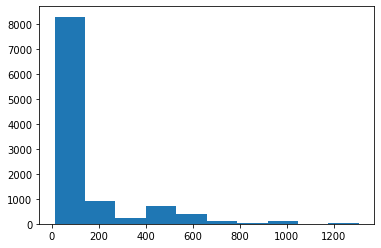

In [10]:
plt.hist(profile_length) #,bins=[10,20,30,40,50,60,70,80,90,100,110]
plt.show()
pro_df = pd.DataFrame(data={'profile':sorted(profile_length)})
pro_df.to_excel('data/tree-rep-profiles-partial/profile_dist.xlsx',index=False)

* remove too long profiles (processes)

In [11]:
outlier_len_profile = profile_stat_df.loc['far_out'].values[0] #outlier

In [12]:
# corpus = []
# window_size = 6
# dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"]+\ *" #等號、底線被保留
mv_dir = './data/tree-rep-profiles-partial/5.long/'
root_dir = './data/tree-rep-profiles-partial/normal/'
fam_dir = next(os.walk(root_dir))[1]
remove_pids = 0
nobyteseq = 0

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        for profile in hl_list:
            with open(profile,encoding='ISO 8859-1') as f:
                lines = f.read().splitlines()
            if len(lines)> outlier_len_profile:
                dest_path = mv_dir + fam + '/' + tree + '/'
                if not os.path.exists(dest_path):
                    os.makedirs(dest_path,exist_ok=True)
                shutil.move(profile,dest_path+profile.split('/')[-1])
                byteseq = profile.split('.profile')[0] + '_byterep.pickle'
                try:
                    shutil.move(byteseq,dest_path+byteseq.split('/')[-1])
                except FileNotFoundError:
                    print(fam,tree)
                    nobyteseq +=1
                remove_pids +=1
print('remove processes:',remove_pids,'No byteseq:',nobyteseq)
            

100%|██████████| 184/184 [00:00<00:00, 271.37it/s]

remove processes: 1990 No byteseq: 0


In [13]:
def statistic_hash_pids(root_dir):
    fam_dir = next(os.walk(root_dir))[1]
    all_pids= []
    all_pid_list = []
    tree_count = 0
    for fam in tqdm(fam_dir):
        tree_dir = next(os.walk(root_dir + fam))[1]
        tree_count += len(tree_dir)
        for tree in tree_dir:
            in_directory = root_dir + fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            hash_list = [f.split('/')[-1].split('_')[0] for f in hl_list]
            pid_list = [f.split('/')[-1] for f in hl_list]
            all_pids.extend(hash_list)
            all_pid_list.extend(pid_list)
#             print(fam,len(hash_list)) #DEBUG
    all_hash = set(all_pids)
    print('Samples#:',len(all_hash),',Processes#:',len(set(all_pid_list)),',Trees#:',tree_count)
    return all_hash, list(set(all_pid_list))

In [14]:
fam_dir = next(os.walk(root_dir))[1]
empty_tree = 0
for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    fam_tree = {}
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) == 0: #移除tree底下的member僅有0個者
            shutil.move(root_dir + fam +  '/' + tree ,mv_dir+fam+'/'+tree)
            empty_tree +=1
print('Empty Tree#:',empty_tree)

root_dir = './data/tree-rep-profiles-partial/normal/'
all_hash,all_pid_list = statistic_hash_pids(root_dir)


100%|██████████| 184/184 [00:00<00:00, 2330.76it/s]

Empty Tree#: 230
Samples#: 6923 ,Processes#: 9403 ,Trees#: 1316


In [15]:
all_pid_list = [x.split('.')[0] for x in all_pid_list]
print(len(all_pid_list))

all_df = name_df_aliases_final.loc[all_pid_list]
all_df

9403


,adload,aira,amonetize,asoecem,autoit,avmh,banker,barys,bdmj,bettersurf,...,lmn_loadmoney,loring_ndropper,madang_madangel,nabucur_virlock,nimnul_ramnit,otwycal_vjadtre,rbot_sdbot,soltern_sytro,valhalla_valla,virtob_virut
5137b4ef89c0d95d3bc325ac351842444db7b987996012d97b99cf4e9ba609f6_2888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42315b64f7efd1322d35ff4156fa6da6e108cefc07a744fce70540a735f00ff5_3300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2e24fa4b77e00baabb112903fd816861813feaadddcc9e32c31b516e48d489e7_2872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07e74d031ce40ed7b5feac2bf148a7213b5786116dbb13c2f211e2c617010086_3268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0ec0232c7cdd830087e492a472260e408f35ccd514b2d12277c8d54538b8c0aa_3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0a0ad2b3429ed19c9371870967c1d60cbc131c6ccf3666d3f6dac878c59c7f32_3128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41dd127ef6b9174dae1c6d4e22076970f24309aad90df57432ac4119435cae4e_3288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6f4b566d48fdf5c5f6d3d1cba799f37d5daf5d90bdfbf2758245ab43a5eec1ea_3284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
eda9122bd9238cc7ced4391e9a7562de2f1467dd86ff9d3052728ea657f31ca6_3428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13ee4dbfa99e271a2efa0bfe06fd5986f91f6f3deafd13d55ca7fa86b82260e6_2868,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
temp = all_df.sort_index()
pid_list = temp.index.tolist()
main_pids = []
for pid in tqdm(pid_list):
    if pid.split('_')[0] not in [x.split('_')[0] for x in main_pids]:
        main_pids.append(pid)
print(len(main_pids))
main_pids

100%|██████████| 9403/9403 [00:07<00:00, 1339.17it/s] 

6923


['0000e27a0471230eecf42e629d36b617c2726e26181b3a7e7e4c03097ae225e5_2968',
 '0002a0dfe991ba7b93501f09221cc60bf72b3ff0c56d6e29f461d105e82a1bd8_3260',
 '00038a453a4eda579348af45b1827393227c1e19be732a75859402ce8ffb4a32_3148',
 '00042aa47c277ad74395803c98a780fea81a70214fa381d17c57137cfd0de597_3316',
 '0004ce2ccfd8544f72495d1df756e92cc22228229267fdc7eab12e4ac5470430_3244',
 '00051a584949223265f235670bc8a6f615b1a55fcda0cf325837a763ccfcb945_2864',
 '00061bafa50e448bdf35d4dcf80cb2d5c9604b33ea491951d85f894ed817011e_2880',
 '0008d6d1dcbe359dab5780be87005be659ea93eae5878a5b6e6ba4ed2d889b09_3244',
 '000a5bfbae87ba7a9770c5f83c70cd1b2bc7a58b08d186a1d6ce295b4a1b020d_3040',
 '000b1ef919bdd062ae75b140dfc0d4493279d43256ca523e91c564b2897b2397_3252',
 '000bdf77d00175bca8c41804af69f3c12b14427128c071d7c6bd224fd1ca8039_3276',
 '000bfe5a6019cd8023396468440719401d66a25407d4163003e0d3afed0aab65_3208',
 '000c43f17cd5eb8d0fd7dc6f5de3dff995d14f593bb47e3df81accd46151aa92_3028',
 '000c517a6d0018f3a09b6598f214a3e48e1a

In [17]:
all_df_main = name_df_aliases_final.loc[main_pids] #如果該家族的data量不到總dataset的1%，則先判定該家族為unk
criteria = len(all_df_main) * 0.01
print(criteria)
fam_names = all_df_main.columns.tolist()
keep_fam = []
all_fam_num = []
for fam in fam_names:
    fam_num = all_df_main[fam].sum()
    all_fam_num.append(fam_num)
    if fam_num > criteria:
        keep_fam.append(fam)
print(len(keep_fam))
keep_fam

69.23
22


['barys',
 'domaiq',
 'elkern',
 'expiro',
 'graftor',
 'kazy',
 'kryptik',
 'razy',
 'solimba',
 'symmi',
 'ursu',
 'vobfus',
 'zbot',
 'zusy',
 'allaple_rahack',
 'downloa_soft',
 'fakealert_fakeav',
 'hotbar_screensaver',
 'lmn_loadmoney',
 'nimnul_ramnit',
 'soltern_sytro',
 'virtob_virut']

In [18]:
basic_statistics(all_fam_num)

,length
mean,56.242236
std,165.006824
mode,7.000000
min,0.000000
q1,6.000000
median,13.000000
q3,41.000000
max,1716.000000
iqr,35.000000
outlier,93.500000


In [19]:
pids = all_df[keep_fam].index.tolist()
left_pids = []
label_nums = []
for pid in tqdm(pids):
    labels = all_df[keep_fam].loc[pid].sum()
    label_nums.append(labels)
    if labels > 0:
        left_pids.append(pid)
print(len(left_pids),left_pids[0])
basic_statistics(label_nums)

100%|██████████| 9403/9403 [00:08<00:00, 1172.52it/s]

6945 5137b4ef89c0d95d3bc325ac351842444db7b987996012d97b99cf4e9ba609f6_2888


,length
mean,0.888865
std,0.635112
mode,1.000000
min,0.000000
q1,0.000000
median,1.000000
q3,1.000000
max,3.000000
iqr,1.000000
outlier,2.500000


In [20]:
pids_main = all_df_main[keep_fam].index.tolist()
left_pids_main = []
label_nums_main = []
for pid in tqdm(pids_main):
    labels = all_df_main[keep_fam].loc[pid].sum()
    label_nums_main.append(labels)
    if labels > 0:
        left_pids_main.append(pid)
print(len(left_pids_main),left_pids_main[0])
basic_statistics(label_nums_main)

100%|██████████| 6923/6923 [00:05<00:00, 1225.70it/s]

5392 0000e27a0471230eecf42e629d36b617c2726e26181b3a7e7e4c03097ae225e5_2968


,length
mean,0.964177
std,0.640390
mode,1.000000
min,0.000000
q1,1.000000
median,1.000000
q3,1.000000
max,3.000000
iqr,0.000000
outlier,1.000000


In [22]:
all_df_pids_final = all_df.loc[left_pids,keep_fam]
all_df_main_final = all_df_main.loc[left_pids_main,keep_fam]
pickle.dump(file=open('./data/tree-rep-profiles-partial/all_df_pids_final_1per.pkl','wb'),obj=all_df_pids_final)
pickle.dump(file=open('./data/tree-rep-profiles-partial/all_df_main_final_1per.pkl','wb'),obj=all_df_main_final)

In [79]:
# EVALUATE for train valid test distribution
from sklearn.metrics.pairwise import cosine_similarity
while (True):
    dev_pid = random.sample(range(0,len(all_df_pids_final)),int(len(all_df_pids_final)*0.1))
    valid_pid = random.sample(dev_pid,int(len(dev_pid)/2))
    test_pid = list(set(dev_pid)-set(valid_pid))
    train_pid = list(set([i for i in range(len(all_df_pids_final))])- set(dev_pid))

    # evaluate distribution
    
    down_train = all_df_pids_final.iloc[train_pid].sum().max()
    up_train = all_df_pids_final.iloc[train_pid].sum()
    vector_train = np.array((up_train / down_train).tolist())

    down_valid = all_df_pids_final.iloc[valid_pid].sum().max()
    up_valid = all_df_pids_final.iloc[valid_pid].sum()
    vector_valid = np.array((up_valid / down_valid).tolist())

    down_test = all_df_pids_final.iloc[test_pid].sum().max()
    up_test = all_df_pids_final.iloc[test_pid].sum()
    vector_test = np.array((up_test / down_test).tolist())
    if (cosine_similarity([vector_train],[vector_valid])) > 0.996 and (cosine_similarity([vector_train],[vector_test])>0.996):
        break
print(cosine_similarity([vector_train],[vector_valid]),cosine_similarity([vector_train],[vector_test])
      ,cosine_similarity([vector_valid],[vector_test]))

[[0.99690471]] [[0.9962096]] [[0.99542214]]


In [92]:
 # EVALUATE for train valid test distribution
while (True):
    dev_pid_main = random.sample(range(0,len(all_df_main_final)),int(len(all_df_main_final)*0.1))
    valid_pid_main = random.sample(dev_pid_main,int(len(dev_pid_main)/2))
    test_pid_main = list(set(dev_pid_main)-set(valid_pid_main))
    train_pid_main = list(set([i for i in range(len(all_df_main_final))])- set(dev_pid_main))

    # evaluate distribution
#     from sklearn.metrics.pairwise import cosine_similarity
    down_train_main = all_df_main_final.iloc[train_pid_main].sum().max()
    up_train_main = all_df_main_final.iloc[train_pid_main].sum()
    vector_train_main = np.array((up_train_main / down_train_main).tolist())

    down_valid_main = all_df_main_final.iloc[valid_pid_main].sum().max()
    up_valid_main = all_df_main_final.iloc[valid_pid_main].sum()
    vector_valid_main = np.array((up_valid_main / down_valid_main).tolist())

    down_test_main = all_df_main_final.iloc[test_pid_main].sum().max()
    up_test_main = all_df_main_final.iloc[test_pid_main].sum()
    vector_test_main = np.array((up_test_main / down_test_main).tolist())
    if (cosine_similarity([vector_train_main],[vector_valid_main])) > 0.996 and (cosine_similarity([vector_train_main],[vector_test_main])>0.996):
        break
print(cosine_similarity([vector_train_main],[vector_valid_main]),cosine_similarity([vector_train_main],[vector_test_main])
      ,cosine_similarity([vector_valid_main],[vector_test_main]))

[[0.99796441]] [[0.996344]] [[0.9922756]]


In [95]:
# 看看最大長度要給03 使用
root_dir = './data/tree-rep-profiles-partial/normal/'
all_pids = all_df_pids_final.index.tolist()
processed_profile = []
profile_length = []
for pid in tqdm(all_pids):
    paths = glob.glob(root_dir +'*/*/'+pid+'.profile' )
    for profile in paths:
        name = profile.split('/')[-1]
        if name not in processed_profile:
            with open(profile,encoding='ISO 8859-1') as f:
                lines = f.read().splitlines()
            processed_profile.append(name)
            profile_length.append(len(lines))
basic_statistics(profile_length)

100%|██████████| 6945/6945 [00:56<00:00, 123.93it/s]


,length
mean,79.056012
std,55.317057
mode,104.000000
min,11.000000
q1,34.000000
median,75.000000
q3,104.000000
max,347.000000
iqr,70.000000
outlier,209.000000


In [96]:
train_pids_df = all_df_pids_final.iloc[train_pid]
valid_pids_df = all_df_pids_final.iloc[valid_pid]
test_pids_df = all_df_pids_final.iloc[test_pid]
train_main_df = all_df_main_final.iloc[train_pid_main]
valid_main_df = all_df_main_final.iloc[valid_pid_main]
test_main_df = all_df_main_final.iloc[test_pid_main]

In [104]:
pickle.dump(file=open('./data/tree-rep-profiles-partial/pids_3df.pkl','wb'),obj=(train_pids_df,valid_pids_df,test_pids_df))
pickle.dump(file=open('./data/tree-rep-profiles-partial/main_3df.pkl','wb'),obj=(train_main_df,valid_main_df,test_main_df))

# 以下deprecated

* family smaller than 15
* dict: key(fam): value(samples)

In [10]:
root_dir = './data/tree-rep-profiles-partial/normal/'
fam_dir = next(os.walk(root_dir))[1]
fam_pids_count = {}

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    tree_pids_count = []
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        tree_pids_count.append(len(hl_list))
    fam_pids_count[fam] = sum(tree_pids_count)

100%|██████████| 184/184 [00:00<00:00, 2048.18it/s]


In [11]:
fam_count = []
for i,v in fam_pids_count.items():
    if v == 0:
        print('No member:',i)
        continue
    fam_count.append(v)
fam_count_df = basic_statistics(fam_count)
fam_count_df #中位數=15

No member: 157.urelas_0.8
No member: 188.darkkomet_0.8
No member: 115.vundo_0.8
No member: 191.ganelp_0.8
No member: 125.rbot_0.8
No member: 87.krypt_0.8
No member: 152.sdbot_0.8
No member: 169.patched_0.8


,length
mean,74.181818
std,194.795641
mode,4.000000
min,3.000000
q1,7.000000
median,15.000000
q3,49.250000
max,1701.000000
iqr,42.250000
outlier,112.625000


In [12]:
fam_pids_count_df = pd.DataFrame.from_dict(fam_pids_count,orient='index',columns=['pids'])
fam_pids_count_df = fam_pids_count_df.sort_values(by=['pids'],ascending=False)
fam_pids_count_df

,pids
1.fakeav_0.8,1701
2.fakealert_0.8,1130
6.allaple_0.8,1007
3.kazy_0.8,809
4.zbot_0.8,633
7.virut_0.8,480
5.symmi_0.8,437
8.ursu_0.8,426
11.virtob_0.8,332
9.solimba_0.8,318


In [13]:
fam_pids_upper = fam_pids_count_df[fam_pids_count_df.pids > 15]
print('final processes#:',fam_pids_upper.pids.sum())
fam_pids_upper

final processes#: 12364


,pids
1.fakeav_0.8,1701
2.fakealert_0.8,1130
6.allaple_0.8,1007
3.kazy_0.8,809
4.zbot_0.8,633
7.virut_0.8,480
5.symmi_0.8,437
8.ursu_0.8,426
11.virtob_0.8,332
9.solimba_0.8,318


* move small families to 'smallFam' dir

In [14]:
fam_small_df = fam_pids_count_df[fam_pids_count_df.pids < 3]
small_families = fam_small_df.index.tolist()
small_families

['87.krypt_0.8',
 '125.rbot_0.8',
 '115.vundo_0.8',
 '188.darkkomet_0.8',
 '169.patched_0.8',
 '191.ganelp_0.8',
 '152.sdbot_0.8',
 '157.urelas_0.8']

In [15]:
root_dir = './data/tree-rep-profiles-partial/normal/'
fam_dir = next(os.walk(root_dir))[1]
mv_dir = './data/tree-rep-profiles-partial/6.smallFam/'
if not os.path.exists(mv_dir):
    os.makedirs(mv_dir,exist_ok=True)

for fam in tqdm(fam_dir):
    if fam in small_families:
        src = os.path.join(root_dir,fam)
        dest = os.path.join(mv_dir,fam)
        shutil.move(src,dest)

mv_dir = './data/tree-rep-profiles-partial/7.emptyTree_of5.Long/'
if not os.path.exists(mv_dir):
    os.makedirs(mv_dir,exist_ok=True)

fam_dir = next(os.walk(root_dir))[1]
empty_tree = 0
for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    fam_tree = {}
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) == 0: #移除tree底下的member僅有0個者
            shutil.move(root_dir + fam +  '/' + tree ,mv_dir+fam+'/'+tree)
            empty_tree +=1
print('Empty Tree#:',empty_tree)
        
fam_dir = next(os.walk(root_dir))[1]
tree_count = 0
all_pids= []
for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    tree_count += len(tree_dir)
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        hash_list = [f.split('/')[-1].split('_')[0] for f in hl_list]
        all_pids.extend(hash_list)
all_hash = set(all_pids)
print(len(all_hash) , len(all_pids),tree_count,len(fam_dir)) #final dataset的(samples, processes,trees#,fam#)
temp = statistic_hash_pids(root_dir)

  0%|          | 0/176 [00:00<?, ?it/s]

Empty Tree#: 0


  0%|          | 0/176 [00:00<?, ?it/s]

6652 13056 1198 176


100%|██████████| 176/176 [00:00<00:00, 1731.99it/s]

Samples#: 6652 ,Processes#: 8829 ,Trees#: 1198


In [16]:
def statistic_hash_pids_fam(root_dir):
    fam_dir = next(os.walk(root_dir))[1]
    fam_count = {}
    for fam in tqdm(fam_dir):
        tree_dir = next(os.walk(root_dir + fam))[1]
#         fam_count[fam] = 0
        all_pids = []
        all_hash = []
        for tree in tree_dir:
            in_directory = root_dir + fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            hash_list = [f.split('/')[-1].split('_')[0] for f in hl_list]
            pid_list = [f.split('/')[-1] for f in hl_list]
            all_pids.extend(hash_list)
#             all_pid_list.extend(pid_list)
        fam_count[fam] = (len(set(all_pids)),len(all_pids))
#             print(fam,len(hash_list)) #DEBUG
#     all_hash = set(all_pids)
    print('(Samples# , PIDs#)')
    return fam_count

In [17]:
fam_count = statistic_hash_pids_fam('./data/tree-rep-profiles-partial/normal/')
nums = []
names = []
for i,v in fam_count.items():
    nums.append(int(i.split('.')[0]))
    names.append(i.split('.')[1].split('_')[0])
    print(i,v)

100%|██████████| 176/176 [00:00<00:00, 1704.66it/s]

(Samples# , PIDs#)
5.symmi_0.8 (383, 437)
117.koutodoor_0.8 (7, 9)
150.minggy_0.8 (10, 14)
69.onlinegames_0.8 (6, 9)
31.kdz_0.8 (31, 36)
38.msil_0.8 (28, 48)
35.nimnul_0.8 (54, 95)
103.yantai_0.8 (26, 26)
62.renos_0.8 (13, 13)
21.ramnit_0.8 (110, 176)
123.archsms_0.8 (7, 7)
167.hybris_0.8 (4, 5)
92.vjadtre_0.8 (5, 9)
144.wbna_0.8 (5, 5)
50.brresmon_0.8 (47, 47)
51.shodi_0.8 (44, 59)
119.chydo_0.8 (6, 6)
25.installcore_0.8 (39, 50)
88.clickdownload_0.8 (19, 22)
27.softpulse_0.8 (44, 71)
158.peed_0.8 (6, 7)
178.installmonetizer_0.8 (7, 15)
56.shiz_0.8 (8, 14)
57.mikey_0.8 (18, 22)
13.graftor_0.8 (109, 134)
42.sirefef_0.8 (40, 51)
43.mira_0.8 (59, 76)
53.simda_0.8 (5, 8)
54.soltern_0.8 (50, 61)
89.mywebsearch_0.8 (13, 13)
173.inffinity_0.8 (5, 5)
131.ndropper_0.8 (1, 4)
39.elkern_0.8 (7, 18)
127.gepys_0.8 (9, 9)
121.fiseria_0.8 (10, 18)
49.upatre_0.8 (44, 51)
45.firseria_0.8 (25, 36)
166.prepender_0.8 (4, 4)
105.crytex_0.8 (7, 9)
176.cryptolocker_0.8 (12, 12)
172.vbinject_0.8 (2, 3)
76.vi

In [18]:
df = pd.DataFrame.from_dict(fam_count,orient='index')
df['idx'] = nums
df['names'] = names
df = df.sort_values(['idx'])
df = df[['names',0,1]]

df.to_excel('./data/tree-rep-profiles-partial/family_samples_pids.xlsx')
df

,names,0,1
1.fakeav_0.8,fakeav,1629,1701
2.fakealert_0.8,fakealert,1091,1130
3.kazy_0.8,kazy,712,809
4.zbot_0.8,zbot,554,633
5.symmi_0.8,symmi,383,437
6.allaple_0.8,allaple,512,1007
7.virut_0.8,virut,312,480
8.ursu_0.8,ursu,321,426
9.solimba_0.8,solimba,288,318
10.zusy_0.8,zusy,203,254


### 還原feature
* 合併家族以前先還原bert feature

In [19]:
src_dir = './data/tree-rep-profiles_one2many/normal/'

In [20]:
def restore_feature(root_dir,src_dir=src_dir):
# root_dir = './data/tree-rep-profiles-partial/normal/'
    fam_dir = next(os.walk(root_dir))[1]
    for fam in tqdm(fam_dir):
        tree_dir = next(os.walk(root_dir + fam))[1]
        for tree in tree_dir:
            in_directory = root_dir + fam +  '/' + tree + '/'
            hl_list = next(os.walk(in_directory))[2]
            hl_list = [os.path.join(in_directory, f) for f in hl_list]
            hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
            for hl in hl_list:
                files = glob.glob(src_dir + fam + '/' + tree + '/'+hl.split('/')[-1].replace('.profile','*'))
                for file in files:
                    shutil.copy(file,in_directory+file.split('/')[-1])

In [21]:
root_dir = './data/tree-rep-profiles-partial/normal/'
restore_feature(root_dir)
# root_dir = './data/tree-rep-profiles-partial/DEV/'
# restore_feature(root_dir)
# root_dir = './data/tree-rep-profiles-partial/TEST/'
# restore_feature(root_dir)

100%|██████████| 176/176 [00:23<00:00,  7.62it/s]


## Aliases combine

In [22]:
# aliases分析
with open('./data/familyAliases.csv','r') as f:
    reader = csv.reader(f)
    my_li = list(reader)
aliase_li = []
for li in my_li:
    aliase_li.append(list(filter(None, li)))
aliase_li

[['allaple', 'rahack'],
 ['autoit', 'barys', 'kryptik'],
 ['zbot',
  'fakealert',
  'bredo',
  'upatre',
  'fakeav',
  'tepfer',
  'zeus',
  'kneber',
  'wsnpoem',
  'citadel'],
 ['delf', 'hoax', 'vbkrypt'],
 ['eggnog', 'elkern'],
 ['graftor', 'ibryte', 'ipamor', 'startpage'],
 ['installerex', 'hotbar', 'installrex'],
 ['kazy', 'kdz', 'symmi', 'zusy', 'malagent', 'sillyfdc', 'ursu'],
 ['loadmoney', 'lmn', 'razy'],
 ['firseria', 'fiseria', 'morstar', 'solimba'],
 ['downloadadmin', 'downloa', 'mikey'],
 ['madang', 'madangel'],
 ['ramnit', 'nimnul'],
 ['virtob', 'sality', 'virut', 'kashu', 'tanatos', 'virux'],
 ['softpulse', 'soft', 'softpuls', 'pulsoft', 'bawswerps']]

In [23]:
# 合併家族數目
root_dir = './data/tree-rep-profiles-partial/normal/'
fam_dir = next(os.walk(root_dir))[1]
c=0
combine_dict={}
for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for aliase in aliase_li:
        name = fam.split('_')[0].split('.')[1]
        if (name in aliase) and (name != aliase[0]):
            try:
#             print('最終家族:',aliase[0],'被合併家族:',name)
                combine_dict[aliase[0]] = aliase[0]+ '、'+ name
            except:
                combine_dict[aliase[0]] = name
            for tree in tree_dir:
                ori_path = root_dir + fam + '/' + tree + '/'
                dest_path = glob.glob(root_dir +'*'+aliase[0]+'*')[0]+'/' + tree + '/'
                copy_tree(ori_path,dest_path)
            shutil.rmtree(root_dir + fam)
            c+=1
            
#             print(aliase)
print(c)
combine_dict

100%|██████████| 176/176 [00:03<00:00, 44.41it/s]

32


{'kazy': 'kazy、zusy',
 'ramnit': 'ramnit、nimnul',
 'downloadadmin': 'downloadadmin、downloa',
 'eggnog': 'eggnog、elkern',
 'firseria': 'firseria、solimba',
 'zbot': 'zbot、tepfer',
 'virtob': 'virtob、sality',
 'autoit': 'autoit、kryptik',
 'madang': 'madang、madangel',
 'graftor': 'graftor、startpage',
 'installerex': 'installerex、installrex',
 'loadmoney': 'loadmoney、lmn',
 'delf': 'delf、vbkrypt',
 'softpulse': 'softpulse、soft',
 'allaple': 'allaple、rahack'}

In [24]:
# 統計
fam_count = statistic_hash_pids_fam('./data/tree-rep-profiles-partial/normal/')
nums = []
names = []
for i,v in fam_count.items():
    nums.append(int(i.split('.')[0]))
    names.append(i.split('.')[1].split('_')[0])
    print(i,v)

# 統計
df = pd.DataFrame.from_dict(fam_count,orient='index')
df['idx'] = nums
df['names'] = names
df = df.sort_values(['idx'])
df = df[['names',0,1]]

# df.to_excel('./data/tree-rep-profiles-partial/family_samples_pids_aliasesOut.xlsx')
df

100%|██████████| 144/144 [00:00<00:00, 660.01it/s]

(Samples# , PIDs#)
117.koutodoor_0.8 (7, 9)
150.minggy_0.8 (10, 14)
69.onlinegames_0.8 (6, 9)
38.msil_0.8 (28, 48)
103.yantai_0.8 (26, 26)
62.renos_0.8 (13, 13)
21.ramnit_0.8 (117, 271)
123.archsms_0.8 (7, 7)
167.hybris_0.8 (4, 5)
92.vjadtre_0.8 (5, 9)
144.wbna_0.8 (5, 5)
50.brresmon_0.8 (47, 47)
51.shodi_0.8 (44, 59)
119.chydo_0.8 (6, 6)
25.installcore_0.8 (39, 50)
88.clickdownload_0.8 (19, 22)
27.softpulse_0.8 (144, 176)
158.peed_0.8 (6, 7)
178.installmonetizer_0.8 (7, 15)
56.shiz_0.8 (8, 14)
13.graftor_0.8 (148, 195)
42.sirefef_0.8 (40, 51)
43.mira_0.8 (59, 76)
53.simda_0.8 (5, 8)
54.soltern_0.8 (50, 61)
89.mywebsearch_0.8 (13, 13)
173.inffinity_0.8 (5, 5)
131.ndropper_0.8 (1, 4)
127.gepys_0.8 (9, 9)
45.firseria_0.8 (345, 429)
166.prepender_0.8 (4, 4)
105.crytex_0.8 (7, 9)
176.cryptolocker_0.8 (12, 12)
172.vbinject_0.8 (2, 3)
76.virlock_0.8 (17, 22)
82.mydoom_0.8 (6, 6)
130.llac_0.8 (3, 3)
101.navattle_0.8 (3, 3)
140.valla_0.8 (4, 4)
97.viking_0.8 (5, 7)
41.outbrowse_0.8 (60, 102)
6

,names,0,1
3.kazy_0.8,kazy,1650,1962
4.zbot_0.8,zbot,2311,3582
6.allaple_0.8,allaple,512,1299
11.virtob_0.8,virtob,343,853
12.loadmoney_0.8,loadmoney,153,243
13.graftor_0.8,graftor,148,195
14.vobfus_0.8,vobfus,181,206
17.expiro_0.8,expiro,101,156
18.sytro_0.8,sytro,153,199
21.ramnit_0.8,ramnit,117,271


In [25]:
#移除小家族
root_dir = './data/tree-rep-profiles-partial/normal/'
unk_fam = './data/tree-rep-profiles-partial/6.smallFam/'
smallfam = df[df[0] <=15].index.tolist()
for fam in smallfam:
    ori_path = root_dir + fam + '/'
    dest_path = unk_fam + fam + '/'
    copy_tree(ori_path,dest_path)
    shutil.rmtree(root_dir + fam)

In [26]:
# 統計
fam_count = statistic_hash_pids_fam('./data/tree-rep-profiles-partial/normal/')
nums = []
names = []
for i,v in fam_count.items():
    nums.append(int(i.split('.')[0]))
    names.append(i.split('.')[1].split('_')[0])
#     print(i,v)
df = pd.DataFrame.from_dict(fam_count,orient='index')
df['idx'] = nums
df['names'] = names
df = df.sort_values(['idx'])
df = df[['names',0,1]]

df.to_excel('./data/tree-rep-profiles-partial/family_samples_pids_aliasesOut.xlsx')

print(len(df))
df 

100%|██████████| 52/52 [00:00<00:00, 261.35it/s]


(Samples# , PIDs#)
52


,names,0,1
3.kazy_0.8,kazy,1650,1962
4.zbot_0.8,zbot,2311,3582
6.allaple_0.8,allaple,512,1299
11.virtob_0.8,virtob,343,853
12.loadmoney_0.8,loadmoney,153,243
13.graftor_0.8,graftor,148,195
14.vobfus_0.8,vobfus,181,206
17.expiro_0.8,expiro,101,156
18.sytro_0.8,sytro,153,199
21.ramnit_0.8,ramnit,117,271


In [27]:
root_dir = './data/tree-rep-profiles-partial/normal/'
samples_hash_train = statistic_hash_pids(root_dir) 

100%|██████████| 52/52 [00:00<00:00, 266.40it/s]

Samples#: 6360 ,Processes#: 8450 ,Trees#: 1038


## Train, Dev , Test Set

In [28]:
root_dir = './data/tree-rep-profiles-partial/normal/'
unk_fam = './data/tree-rep-profiles-partial/6.smallFam/'
all_df = pd.read_csv('./data/tree-rep-profiles-partial/process2family_df.csv')
fam_dir = next(os.walk(root_dir))[1]
fam_unk = next(os.walk(unk_fam))[1]
normal_fam = [x.split('_')[0] for x in fam_dir]
sorted(fam_dir)#正常最後要拿下去train的family

['103.yantai_0.8',
 '104.mresmon_0.8',
 '11.virtob_0.8',
 '111.vbran_0.8',
 '12.loadmoney_0.8',
 '124.avmh_0.8',
 '13.graftor_0.8',
 '14.vobfus_0.8',
 '151.downloadadmin_0.8',
 '17.expiro_0.8',
 '18.sytro_0.8',
 '21.ramnit_0.8',
 '22.domaiq_0.8',
 '25.installcore_0.8',
 '27.softpulse_0.8',
 '28.strictor_0.8',
 '29.delf_0.8',
 '3.kazy_0.8',
 '30.mplug_0.8',
 '32.browsefox_0.8',
 '33.autoit_0.8',
 '37.parite_0.8',
 '38.msil_0.8',
 '4.zbot_0.8',
 '41.outbrowse_0.8',
 '42.sirefef_0.8',
 '43.mira_0.8',
 '44.screensaver_0.8',
 '45.firseria_0.8',
 '46.killav_0.8',
 '47.somoto_0.8',
 '50.brresmon_0.8',
 '51.shodi_0.8',
 '54.soltern_0.8',
 '55.zygug_0.8',
 '59.megasearch_0.8',
 '6.allaple_0.8',
 '60.conjar_0.8',
 '63.jorik_0.8',
 '64.installerex_0.8',
 '65.shipup_0.8',
 '66.bdmj_0.8',
 '71.eggnog_0.8',
 '75.fesber_0.8',
 '76.virlock_0.8',
 '77.lollipop_0.8',
 '78.vilsel_0.8',
 '80.madang_0.8',
 '81.picsys_0.8',
 '84.directdow_0.8',
 '88.clickdownload_0.8',
 '96.mabezat_0.8']

* remove empty tree

In [29]:
# mv_dir = './data/tree-rep-profiles-partial/7.emptyTree_of5.Long/'
# if not os.path.exists(mv_dir):
#     os.makedirs(mv_dir,exist_ok=True)

# empty_tree = 0
# for fam in tqdm(fam_dir):
#     tree_dir = next(os.walk(root_dir + fam))[1]
#     fam_tree = {}
#     for tree in tree_dir:
#         in_directory = root_dir + fam +  '/' + tree + '/'
#         hl_list = next(os.walk(in_directory))[2]
#         hl_list = [os.path.join(in_directory, f) for f in hl_list]
#         hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
#         if len(hl_list) == 0:
#             shutil.move(root_dir + fam +  '/' + tree ,mv_dir+fam+'/'+tree)
#             empty_tree +=1
# print('Empty Tree#:',empty_tree)

move file to valid & test

In [30]:
valid_dir = './data/tree-rep-profiles-partial/DEV/'
test_dir = './data/tree-rep-profiles-partial/TEST/'

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    fam_tree = {}
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        fam_tree[tree]=len(hl_list)
        temp = pd.DataFrame.from_dict(fam_tree,orient='index',columns=['pids'])
        temp = temp.sort_values(by=['pids'])
        if len(hl_list)>10:# 從各tree拿一個sample給dev一個給test
            dest_path = valid_dir + fam + '/' + tree + '/'
            if not os.path.exists(dest_path):
                os.makedirs(dest_path,exist_ok=True)
            ran = random.randint(0,len(hl_list)-1)
            byteseq = hl_list[ran].split('.profile')[0] + '_byterep.pickle'
            feature = hl_list[ran].split('.profile')[0] + '_tokenfeature.pkl'
            clean = hl_list[ran].split('.profile')[0] +'.profile_clean'
            clsf = hl_list[ran].split('.profile')[0] + '_clsfeature.pkl'
            shutil.move(hl_list[ran], dest_path+ hl_list[ran].split('/')[-1])
            shutil.move(byteseq,dest_path)
            shutil.move(feature,dest_path)
            shutil.move(clean,dest_path)
            shutil.move(clsf,dest_path)
            
            dest_path = test_dir + fam + '/' + tree + '/'
            if not os.path.exists(dest_path):
                os.makedirs(dest_path,exist_ok=True)
            try:
                byteseq = hl_list[ran+1].split('.profile')[0] + '_byterep.pickle'
                feature = hl_list[ran+1].split('.profile')[0] + '_tokenfeature.pkl'
                clean = hl_list[ran+1].split('.profile')[0] +'.profile_clean'
                clsf = hl_list[ran+1].split('.profile')[0] + '_clsfeature.pkl'
                shutil.move(hl_list[ran+1], dest_path+ hl_list[ran+1].split('/')[-1])
                shutil.move(byteseq,dest_path)
                shutil.move(feature,dest_path)
                shutil.move(clean,dest_path)
                shutil.move(clsf,dest_path)
            except IndexError:    
                byteseq = hl_list[ran-1].split('.profile')[0] + '_byterep.pickle'
                feature = hl_list[ran-1].split('.profile')[0] + '_tokenfeature.pkl'
                clean = hl_list[ran-1].split('.profile')[0] +'.profile_clean'
                clsf = hl_list[ran-1].split('.profile')[0] + '_clsfeature.pkl'
                shutil.move(hl_list[ran-1], dest_path+ hl_list[ran-1].split('/')[-1])
                shutil.move(byteseq,dest_path)
                shutil.move(feature,dest_path)
                shutil.move(clean,dest_path)
                shutil.move(clsf,dest_path)
    if len(fam_tree)>10: #拿一棵樹給dev一顆給train
        test_tree_name = temp.iloc[0].name
        valid_tree_name = temp.iloc[1].name
        dest_path = valid_dir + fam + '/' + valid_tree_name + '/'
        ori_path = root_dir + fam +  '/' + valid_tree_name + '/'
        if not os.path.exists(dest_path):
            os.makedirs(dest_path,exist_ok=True)
        copy_tree(ori_path,dest_path)
        shutil.rmtree(ori_path)
        ori_path = root_dir + fam +  '/' + test_tree_name + '/'
        dest_path = test_dir + fam + '/' + test_tree_name + '/'
        if not os.path.exists(dest_path):
            os.makedirs(dest_path,exist_ok=True)
        copy_tree(ori_path,dest_path)
        shutil.rmtree(ori_path)
#     else: #最大tree挑選兩個sample
#         VTtree = temp.iloc[-1].name 
#         in_directory = root_dir + fam +  '/' + VTtree + '/'
#         hl_list = next(os.walk(in_directory))[2]
#         hl_list = [os.path.join(in_directory, f) for f in hl_list]
#         hl_list = list(filter(lambda f: f.endswith((".profile")), hl_list))
#         hl_list = sorted(hl_list)
#         dest_path = valid_dir + fam + '/' + VTtree + '/'
#         if not os.path.exists(dest_path):
#             os.makedirs(dest_path,exist_ok=True)
#         ran = random.randint(0,len(hl_list)-1)
#         shutil.move(hl_list[ran],dest_path + hl_list[ran].split('/')[-1])
#         byteseq = hl_list[ran].split('.profile')[0] + '_byterep.pickle'
#         try:
#             shutil.move(byteseq,dest_path + byteseq.split('/')[-1])
#         except FileNotFoundError:
#             print('No Byte String:',fam,tree)
#         dest_path = test_dir + fam + '/' + VTtree + '/'
#         if not os.path.exists(dest_path):
#             os.makedirs(dest_path,exist_ok=True)
#         try:
#             shutil.move(hl_list[ran+1],dest_path + hl_list[ran+1].split('/')[-1]) #所有同樣名稱的都要拿? 可能會產生空樹
#             byteseq = hl_list[ran+1].split('.profile')[0] + '_byterep.pickle'
#             try:
#                 shutil.move(byteseq,dest_path + byteseq.split('/')[-1])
#             except FileNotFoundError:
#                 print('No Byte String:',fam,tree)
#         except IndexError:
#             shutil.move(hl_list[ran-1],dest_path + hl_list[ran-1].split('/')[-1])
#             byteseq = hl_list[ran-1].split('.profile')[0] + '_byterep.pickle'
#             try:
#                 shutil.move(byteseq,dest_path + byteseq.split('/')[-1])
#             except FileNotFoundError:
#                 print('No Byte String:',fam,tree)



100%|██████████| 52/52 [00:01<00:00, 49.59it/s]


* 計算train : valid : test比例
* 依照比例分配unk_pid數目

In [31]:
#移除沒有在DEV跟TEST裡面的family
root_dir = './data/tree-rep-profiles-partial/DEV/'
fam_dir_valid = next(os.walk(root_dir))[1]
root_dir = './data/tree-rep-profiles-partial/normal/'
unk_fam = './data/tree-rep-profiles-partial/6.smallFam/'
fam_dir_train = next(os.walk(root_dir))[1]
for fam in fam_dir_train:
    if fam not in fam_dir_valid:
        ori_path = root_dir + fam + '/'
        dest_path = unk_fam + fam + '/'
        copy_tree(ori_path,dest_path)
        shutil.rmtree(root_dir + fam)
        print(fam)

50.brresmon_0.8
25.installcore_0.8
76.virlock_0.8
80.madang_0.8
96.mabezat_0.8
77.lollipop_0.8
28.strictor_0.8
46.killav_0.8


In [32]:
root_dir = './data/tree-rep-profiles-partial/DEV/'
samples_hash_valid = statistic_hash_pids(root_dir) 
root_dir = './data/tree-rep-profiles-partial/TEST/'
samples_hash_test = statistic_hash_pids(root_dir) 
root_dir = './data/tree-rep-profiles-partial/normal/'
samples_hash_train = statistic_hash_pids(root_dir) 
fam_dir = next(os.walk(root_dir))[1]
normal_fam = [x.split('_')[0] for x in fam_dir]

  0%|          | 0/44 [00:00<?, ?it/s]

Samples#: 255 ,Processes#: 270 ,Trees#: 237
Samples#: 254 ,Processes#: 264 ,Trees#: 237


100%|██████████| 44/44 [00:00<00:00, 238.46it/s]


Samples#: 6071 ,Processes#: 8027 ,Trees#: 950


In [33]:
# 純統計
unk_pid = []
for fam in tqdm(fam_unk):
    tree_dir = next(os.walk(unk_fam + fam))[1]
    tree_count += len(tree_dir)
    for tree in tree_dir:
        in_directory = unk_fam + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        hash_list = [f.split('/')[-1].split('.')[0] for f in hl_list]
        for pid in hash_list:
            profile_df = all_df[all_df.profile == pid]
            if profile_df[normal_fam].sum().sum() == 0:
                unk_pid.append(profile_df.profile.values[0])
unk_hash = [x.split('_')[0] for x in unk_pid]
unk_hash = list(set(unk_hash))
print('UNK_Samples#:',len(unk_hash),'UNK_Processes#:',len(set(unk_pid)))

100%|██████████| 100/100 [00:01<00:00, 51.96it/s]

UNK_Samples#: 303 UNK_Processes#: 379


* 依照hash來分valid,test,train set
* 利用random比例來丟同樣samples到同一個set當中
* **暫時不做**

In [34]:
'''train_unk_path = './data/tree-rep-profiles-partial/normal/0.unknown/G0/'
valid_unk_path = './data/tree-rep-profiles-partial/DEV/0.unknown/G0/'
test_unk_path = './data/tree-rep-profiles-partial/TEST/0.unkwown/G0/'
if not os.path.exists(train_unk_path):
    os.makedirs(train_unk_path,exist_ok=True)
if not os.path.exists(valid_unk_path):
    os.makedirs(valid_unk_path,exist_ok=True)
if not os.path.exists(test_unk_path):
    os.makedirs(test_unk_path,exist_ok=True)

used_hashes = []
for fam in tqdm(fam_unk):
    tree_dir = next(os.walk(unk_fam + fam))[1]
    tree_count += len(tree_dir)
    for tree in tree_dir:
        in_directory = unk_fam + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        hash_list = [f.split('/')[-1].split('.')[0] for f in hl_list]
        for pid in hash_list:
            profile_df = all_df[all_df.profile == pid]
            if profile_df[normal_fam].sum().sum() == 0:
                unk_hash = profile_df.profile.values[0].split('_')[0]
                if unk_hash in set(used_hashes):
                    break
                used_hashes.append(unk_hash)
                ran = random.randint(1,len(samples_hash_train)+len(samples_hash_valid)+len(samples_hash_test))
                unk_files = []
                duplicate_pid = []
                for filepath in Path(unk_fam).glob('**/'+unk_hash+'*'):
                    pid = str(filepath).split('/')[-1]
                    if pid in set(duplicate_pid):
                        break
                    duplicate_pid.append(pid)
                    unk_files.append(filepath)
                unk_files = list(set(unk_files))
                if ran <= len(samples_hash_valid): #valid
                    for file in unk_files:
                        shutil.move(str(file),valid_unk_path)
                elif ran < len(samples_hash_valid)+ len(samples_hash_test): #test
                    for file in unk_files:
                        shutil.move(str(file),test_unk_path)
                else: #train
                    for file in unk_files:
                        shutil.move(str(file),train_unk_path)
                    '''

'train_unk_path = \'./data/tree-rep-profiles-partial/normal/0.unknown/G0/\'\nvalid_unk_path = \'./data/tree-rep-profiles-partial/DEV/0.unknown/G0/\'\ntest_unk_path = \'./data/tree-rep-profiles-partial/TEST/0.unkwown/G0/\'\nif not os.path.exists(train_unk_path):\n    os.makedirs(train_unk_path,exist_ok=True)\nif not os.path.exists(valid_unk_path):\n    os.makedirs(valid_unk_path,exist_ok=True)\nif not os.path.exists(test_unk_path):\n    os.makedirs(test_unk_path,exist_ok=True)\n\nused_hashes = []\nfor fam in tqdm(fam_unk):\n    tree_dir = next(os.walk(unk_fam + fam))[1]\n    tree_count += len(tree_dir)\n    for tree in tree_dir:\n        in_directory = unk_fam + fam +  \'/\' + tree + \'/\'\n        hl_list = next(os.walk(in_directory))[2]\n        hl_list = [os.path.join(in_directory, f) for f in hl_list]\n        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))\n        hash_list = [f.split(\'/\')[-1].split(\'.\')[0] for f in hl_list]\n        for pid in hash_list:\n  

以上UNK暫時不做

In [35]:
# trees# 要減1
root_dir = './data/tree-rep-profiles-partial/DEV/'
samples_hash_valid, samples_pid_valid = statistic_hash_pids(root_dir) 
root_dir = './data/tree-rep-profiles-partial/TEST/'
samples_hash_test, samples_pid_test = statistic_hash_pids(root_dir) 
root_dir = './data/tree-rep-profiles-partial/normal/'
samples_hash_train, samples_pid_train = statistic_hash_pids(root_dir) 

  0%|          | 0/44 [00:00<?, ?it/s]

Samples#: 255 ,Processes#: 270 ,Trees#: 237
Samples#: 254 ,Processes#: 264 ,Trees#: 237


100%|██████████| 44/44 [00:00<00:00, 232.04it/s]

Samples#: 6071 ,Processes#: 8027 ,Trees#: 950


* prepare Sent2Vec training data
* save profile file name of [train, dev, test] to pickle

In [36]:
count = 0
for i in range(len(samples_pid_valid)):
#     for file in glob.glob('./data/tree-rep-profiles-partial/normal/*/*'+samples_pid_valid[i].split('_')[0]+'*'):
    for file in glob.glob('./data/tree-rep-profiles-partial/normal/*/*/'+samples_pid_valid[i].split('.')[0]+'*'):
        dest_file = file.replace('normal','DEV')
        dest_dir = '/'.join(dest_file.split('/')[:-1]) + '/'
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir,exist_ok=True)
        shutil.move(file,dest_file)
        count +=1
print(count/2)
count = 0
for i in range(len(samples_pid_test)):
#     for file in glob.glob('./data/tree-rep-profiles-partial/normal/*/*'+samples_pid_valid[i].split('_')[0]+'*'):
    for file in glob.glob('./data/tree-rep-profiles-partial/normal/*/*/'+samples_pid_test[i].split('.')[0]+'*'):
        dest_file = file.replace('normal','TEST')
        dest_dir = '/'.join(dest_file.split('/')[:-1]) + '/'
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir,exist_ok=True)
        shutil.move(file,dest_file)
        count +=1
print(count/2)

405.0
392.5


In [37]:
mv_dir = './data/tree-rep-profiles-partial/7.emptyTree_of5.Long/'
if not os.path.exists(mv_dir):
    os.makedirs(mv_dir,exist_ok=True)
    
root_dir = './data/tree-rep-profiles-partial/normal/'
fam_dir = next(os.walk(root_dir))[1]
empty_tree = 0
for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    fam_tree = {}
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        if len(hl_list) == 0: #移除tree底下的member僅有0個者
            shutil.move(root_dir + fam +  '/' + tree ,mv_dir+fam+'/'+tree)
            empty_tree +=1
print('Empty Tree#:',empty_tree)

100%|██████████| 44/44 [00:00<00:00, 259.86it/s]

Empty Tree#: 4


In [38]:
# trees# 要減1
root_dir = './data/tree-rep-profiles-partial/DEV/'
samples_hash_valid, samples_pid_valid = statistic_hash_pids(root_dir) 
root_dir = './data/tree-rep-profiles-partial/TEST/'
samples_hash_test, samples_pid_test = statistic_hash_pids(root_dir) 
root_dir = './data/tree-rep-profiles-partial/normal/'
samples_hash_train, samples_pid_train = statistic_hash_pids(root_dir) 

 68%|██████▊   | 30/44 [00:00<00:00, 296.48it/s]

Samples#: 255 ,Processes#: 270 ,Trees#: 263
Samples#: 254 ,Processes#: 264 ,Trees#: 274


100%|██████████| 44/44 [00:00<00:00, 245.86it/s]

Samples#: 5885 ,Processes#: 7771 ,Trees#: 946


In [39]:
pickle.dump(file=open('./data/tree-rep-profiles-partial/TRAIN_pidNames.pkl','wb'),obj=samples_pid_train)
pickle.dump(file=open('./data/tree-rep-profiles-partial/DEV_pidNames.pkl','wb'),obj=samples_pid_valid)
pickle.dump(file=open('./data/tree-rep-profiles-partial/TEST_pidNames.pkl','wb'),obj=samples_pid_test)
pickle.dump(file=open('./data/tree-rep-profiles-partial/UNK_hask.pkl','wb'),obj=unk_hash)

# for sent2vec only (not necessary)

In [8]:
dil= r"[,.;\-+^()/@#?!&$:{}\\*%~\'\"\=\_]+\ *" #等號、底線被保留
root_dir = './data/tree-rep-profiles-partial/normal/'
fam_dir = next(os.walk(root_dir))[1]
api_length = []
profile_length = []

for fam in tqdm(fam_dir):
    tree_dir = next(os.walk(root_dir + fam))[1]
    for tree in tree_dir:
        in_directory = root_dir + fam +  '/' + tree + '/'
        hl_list = next(os.walk(in_directory))[2]
        hl_list = [os.path.join(in_directory, f) for f in hl_list]
        hl_list = list(filter(lambda f: f.endswith(".profile"), hl_list))
        for profile in hl_list:
            with open(profile,encoding='ISO 8859-1') as f:
                lines = f.read().splitlines()
            for line in lines:
                temp = re.sub(dil," ",line.lower())
                temp = temp.split(" ")
                temp = list(filter(None, temp))
                api_length.append(len(temp))

100%|██████████| 44/44 [00:06<00:00,  6.70it/s]


In [9]:
basic_statistics(api_length)

,length
mean,15.099237
std,4.444819
mode,16.000000
min,3.000000
q1,13.000000
median,16.000000
q3,18.000000
max,36.000000
iqr,5.000000
outlier,25.500000


woParam : 16
Param: 13

In [3]:
import numpy as np 

In [5]:
(np.array([0.154523547, 0.56843548, 0.782358545]) + np.array([0.264825458, -0.37254581, 0.64235424]))/2

array([0.2096745 , 0.09794484, 0.71235639])

In [9]:
-0.37254581 - 0.15563215

-0.52817796

In [11]:
0.9477825464949928  * 3045

2885.997854077253